# Differential Expression Gene Analysis for RapidDx Pilot

### Libraries and packages Installation

1) Install packages:

In [1]:
install.packages("gplots")
install.packages("DT")
install.packages("calibrate")
install.packages("statmod")

also installing the dependencies ‘gtools’, ‘gdata’, ‘caTools’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘htmlwidgets’, ‘crosstalk’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


2) Install Bioconductor libraries:

In [2]:
library(BiocInstaller)
biocLite()
biocLite("impute") # requirements for WGCNA package
biocLite("GO.db")
biocLite("preprocessCore")
biocLite("limma")
biocLite("lumi")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Old packages: 'backports', 'bindrcpp', 'bit64', 'blob', 'broom', 'caret',
  'cluster', 'curl', 'ddalpha', 'digest', 'forecast', 'foreign',
  'futile.options', 'GenomicAlignments', 'git2r', 'hms', 'httpuv', 'kernlab',
  'lambda.r', 'lattice', 'lava', 'lmtest', 'lubridate', 'maftools', 'MASS',
  'Matrix', 'nlme', 'pbdZMQ', 'pillar', 'plogr', 'prodlim', 'psych',
  'randomForest', 'Rcpp', 'RcppArmadillo', 'RCurl', 'readxl', 'repr',
  'rmarkdown', 'RMySQL', 'robustbase', 'rprojroot', 'RSQLite', 'selectr',
  'sfsmisc', 'slam', 'sourcetools', 'stringi', 'survival', 'tidyselect',
  'tidyverse', 'timeDate', 'tseries', 'viridisLite', 'withr', 'XML', 'xml2',
  'yaml'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Installing package(s) ‘impute’
Updating HTML index of

In [3]:
install.packages("WGCNA")

also installing the dependencies ‘backports’, ‘checkmate’, ‘viridisLite’, ‘mvtnorm’, ‘pcaPP’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘htmlTable’, ‘viridis’, ‘fit.models’, ‘rrcov’, ‘dynamicTreeCut’, ‘fastcluster’, ‘Hmisc’, ‘robust’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## GENE EXPRESSION ANALYSIS

#### Import libraries

In [4]:
library(RColorBrewer) # Colour palette
library(xtable)       # HTML tables for Rmarkdown, http://kbroman.org/knitr_knutshell/pages/figs_tables.html
library(readr)
library(readxl)   
library(plyr) 
library(calibrate)
library(WGCNA)        # Gene modules
library(gplots)       # Pretty heatmaps
library(DT)
library(limma) 
library(biomaRt)

Loading required package: MASS
Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:stats’:

    hclust




*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=2
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=2
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*





Attaching package: ‘WGCNA’

The following object is masked from ‘package:stats’:

    cor


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [5]:
table_html_attributes <- 'border="3" align="center" style="border-collapse: collapse; text-align: right; width: 75%; background-color: #f7f7f7; border-color: #cccccc; "' ## HTML/CSS for xtable formatting

#### Get study files:
1. **Study:** GSE63878
2. **Platform:** GPL6244 = [HuGene-1_0-st] Affymetrix Human Gene 1.0 ST Array [transcript (gene) version]

In [6]:
source('brain_api_functions.R')
GSE63878 <- download_data('GSE63878')
dataA=GSE63878
head(dataA)

Loading required package: httr
Loading required package: jsonlite
Warning message:
“Missing column names filled in: 'X99' [99], 'X100' [100], 'X101' [101], 'X102' [102], 'X103' [103]”Parsed with column specification:
cols(
  .default = col_double(),
  `Probe ID` = col_integer(),
  `Gene Symbol` = col_character(),
  X99 = col_character(),
  X100 = col_character(),
  X101 = col_character(),
  X102 = col_character(),
  X103 = col_character()
)
See spec(...) for full column specifications.


Probe ID,Gene Symbol,Sample1_1,Sample1_3,Sample2_1,Sample2_3,Sample3_1,Sample3_3,Sample4_1,Sample4_3,⋯,Sample46_3,Sample47_1,Sample47_3,Sample48_1,Sample48_3,X99,X100,X101,X102,X103
8066716,ELMO2,9.137931,7.879140,8.706623,8.413021,8.871833,7.684935,9.283664,8.278483,⋯,8.542750,8.799327,8.998155,8.677686,8.756859,NA,NA,NA,NA,NA
8030368,RPS11,11.924280,11.573510,11.799527,11.755598,12.007807,11.758845,11.930047,11.928939,⋯,12.123981,11.995779,12.017707,12.050722,12.107991,NA,NA,NA,NA,NA
7980044,PNMA1,7.015597,6.370872,6.821562,6.638079,6.968514,6.326143,6.848688,6.813374,⋯,6.868656,6.924999,6.867908,6.782773,7.067915,NA,NA,NA,NA,NA
7940479,TMEM216,7.503816,5.972232,7.194987,6.272724,7.196858,6.401971,7.143758,6.802013,⋯,6.614511,6.913884,7.471228,6.982341,7.057705,NA,NA,NA,NA,NA
8066279,ZHX3,6.344508,6.955141,6.720097,6.787643,6.648538,6.777332,6.500822,6.544580,⋯,6.824411,6.714426,6.355158,6.598794,6.505404,NA,NA,NA,NA,NA
7969935,ERCC5,8.504006,7.903324,8.427732,8.286912,8.678836,8.270879,8.465731,8.491989,⋯,8.505163,8.446239,8.659479,8.399842,8.438832,NA,NA,NA,NA,NA


In [7]:
row.names(dataA)=unlist(dataA[,2])
names(dataA)[names(dataA)=="Gene Symbol"]="Symbol"
dim(dataA)

Warning message:
“Setting row names on a tibble is deprecated.”

[1] 10184   103

In [8]:
class(dataA$Symbol)
exprs.max <- apply(dataA, 1, max)


[1] "character"

#### Remove outliers:

In [9]:
beta.normA=dataA[,-c(1,2,99, 100, 101, 102,103)]
beta.normA= sapply(beta.normA, as.numeric)
row.names(beta.normA)=unlist(dataA[,2]) # then fix row names
dim(beta.normA)

[1] 10184    96

#### Load phenotypes:

In [10]:
#pheno_63878 <- read_delim("pheno_63878_2.txt", "\t", escape_double = FALSE, trim_ws = TRUE)
pheno_63878 <- get_phenodata('bhc-RAPID-DxPilot', 'GSE63878')
phenoA=pheno_63878
row.names(phenoA)=unlist(phenoA[,2])
phenoA <- data.frame(phenoA)[colnames(beta.normA),]
dim(phenoA)

[1] 96  6

### PRE-DEPLOYMENT ANALYSIS

In [11]:
phenoXA = phenoA[phenoA$Time==1 ,]#Selecting Time 1=pre-deployment
# Adjusting the expression matrix to the selected subjects
beta.normXA<- beta.normA[,rownames(phenoXA)]
# Count subjects used in the analysis
count(phenoXA$PTSD==1)
count(phenoXA$PTSD==2)

x,freq
FALSE,24
TRUE,24


x,freq
FALSE,24
TRUE,24


#### Step1: Create Design Matrix: 
- Age (if applicable)
- Gender (if applicable)
- PCs from Pop strat (if applicable) 
- Cell types (if applicable)
- PTSD Current


In [12]:
design<-model.matrix(~PTSD, data=phenoXA)
colnames(design)[2] <- "PTSD"

#### Step 2: Run Model

In [13]:
fit<-lmFit(beta.normXA, design) # Runs linear models
fit.coef<-fit$coef # Extracts the beta coefficients

Calculate the number of subjects with complete beta values

In [14]:
N.subjects<-apply(beta.normXA, 1, function(x) sum(!is.na(x)))
fit.coef<-cbind(fit.coef, N.subjects) # Adds N subjects to the coefficients for use in weighting
contrast.matrix<-makeContrasts(PTSD, levels=design)
contrast.matrix # Contrast matrix extracts only the coefficient we are interested in
rownames(contrast.matrix)[1]<-"Intercept" # Have to rename the contrast matrix
contrast.matrix

Warning message in makeContrasts(PTSD, levels = design):
“Renaming (Intercept) to Intercept”

,PTSD
Intercept,0
PTSD,1


,PTSD
Intercept,0
PTSD,1


#### Step 3: Get top expressed genes and plots

In [15]:
fit2<-contrasts.fit(fit, contrast.matrix)
fit2.ebayes<-eBayes(fit2) # Run empirical bayes
results1=topTable(fit2.ebayes,number=nrow(fit2.ebayes),coef=1, adjust="BH")
save(fit.coef, fit2.ebayes, results1, file="Array_1.RData") # These will be used in meta-analysis
topTable(fit2.ebayes,n=10,coef=1, adjust="BH")

Warning message in contrasts.fit(fit, contrast.matrix):
“row names of contrasts don't match col names of coefficients”

,logFC,AveExpr,t,P.Value,adj.P.Val,B
EPSTI1,0.6743080,7.068911,4.028882,0.0001806456,0.9997817,-0.5433309
CMPK2,0.4159198,8.218987,3.521596,0.0008936601,0.9997817,-1.4862976
RSAD2,0.8588388,7.657406,3.504185,0.0009423122,0.9997817,-1.5176713
DDX60,0.4428068,7.602212,3.415901,0.0012303623,0.9997817,-1.6755825
OAS2,0.3877833,9.368139,3.139186,0.0027729553,0.9997817,-2.1568231
IFI44L,0.6753420,8.852089,3.115332,0.0029689898,0.9997817,-2.1972553
CCL3,-0.2234881,7.355815,-3.084680,0.0032400092,0.9997817,-2.2489496
HERC5,0.4925915,7.629613,3.050911,0.0035653431,0.9997817,-2.3055556
LAP3,0.3373339,8.383133,3.040804,0.0036685091,0.9997817,-2.3224268
SP140,0.2114585,8.315627,3.037494,0.0037028940,0.9997817,-2.3279443


Make a **basic volcano plot**

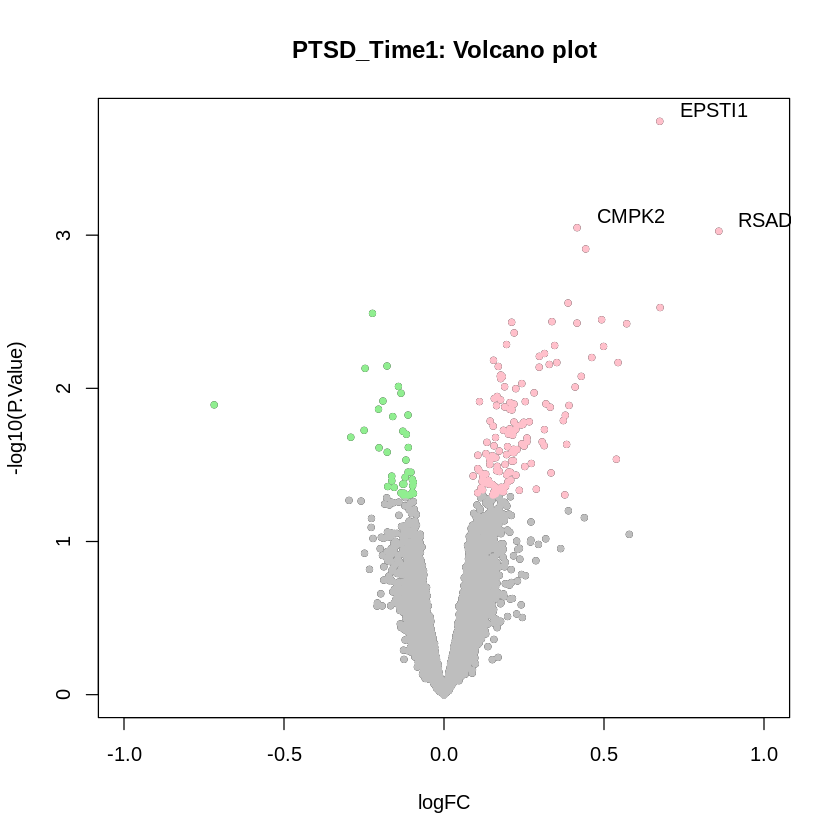

In [16]:
res <- results1
names <- rownames(res)
rownames(res) <- NULL
res <- cbind(names,res)

par(mfrow=c(1,1))
with(res, plot(logFC, -log10(P.Value), pch=20, main="PTSD_Time1: Volcano plot", xlim=c(-1.0,1.0)))

# Add colored points: red if adj.P.Val<0.05, orange of log2FC>1, green if both)
with(subset(res, P.Value>.05 ), points(logFC, -log10(P.Value), pch=20, col="grey"))
with(subset(res, P.Value<.05 & logFC<0), points(logFC, -log10(P.Value), pch=20, col="light green"))
with(subset(res, P.Value<.05 & logFC>0), points(logFC, -log10(P.Value), pch=20, col="pink"))
with(subset(res, adj.P.Val<.05 & logFC<0), points(logFC, -log10(P.Value), pch=20, col="green"))
with(subset(res, adj.P.Val<.05 & logFC>0), points(logFC, -log10(P.Value), pch=20, col="red"))

# Label points with the textxy function from the calibrate plot
with(subset(res, P.Value <0.001), textxy(logFC, -log10(P.Value), labs=names, cex=1))
with(subset(res, P.Value <0.01 & abs(logFC)>2.0), textxy(logFC, -log10(P.Value), labs=names, cex=1))

Plot **heatmap**

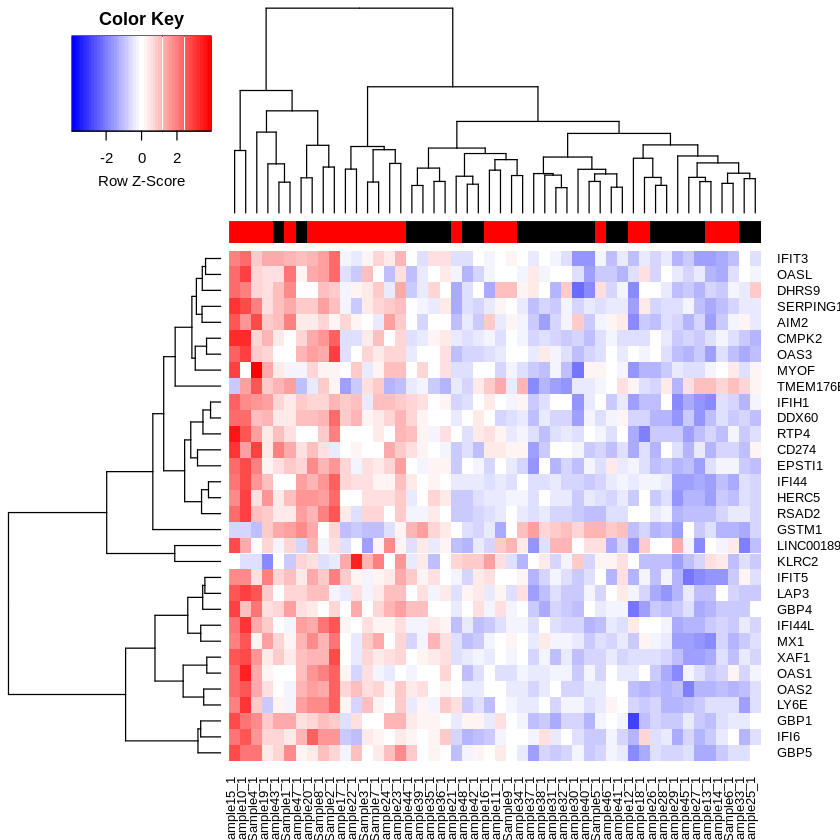

In [17]:
results1_2=results1[results1$P.Val< 0.05 & abs(results1$logFC)>0.3,] #p<0.05
tphenoXA=t(phenoXA)
heat_T=heatmap.2(beta.normXA[rownames(results1_2),],                
                 trace="none", density="none", col=bluered(50), cexRow=1, cexCol=1, margins = c(5.0,5.0),
                 ColSideColors=tphenoXA["PTSD",], scale="row")

### POST-DEPLOYMENT ANALYSIS

In [18]:
phenoXA = phenoA[phenoA$Time==2,] # Selecting Time 2=post-deployment
# Adjusting the expression matrix to the selected subjects
beta.normXA<- beta.normA[,rownames(phenoXA)]
# Count subjects used in the analysis
count(phenoXA$PTSD==1)
count(phenoXA$PTSD==2)

x,freq
FALSE,24
TRUE,24


x,freq
FALSE,24
TRUE,24


#### Step1: Create Design Matrix

In [19]:
design<-model.matrix(~PTSD, data=phenoXA)
colnames(design)[2] <- "PTSD"

#### Step 2: Run Model

In [20]:
fit<-lmFit(beta.normXA, design) # Runs linear models
fit.coef<-fit$coef # Extracts the beta coefficients

Calculate the number of subjects with complete beta values

In [21]:
N.subjects<-apply(beta.normXA, 1, function(x) sum(!is.na(x)))

fit.coef<-cbind(fit.coef, N.subjects) # Adds N subjects to the coefficients for use in weighting
contrast.matrix<-makeContrasts(PTSD, levels=design) # HERE HERE
contrast.matrix # Contrast matrix extracts only the coefficient we are interested in
rownames(contrast.matrix)[1]<-"(Intercept)" # Have to rename the contrast matrix
contrast.matrix

Warning message in makeContrasts(PTSD, levels = design):
“Renaming (Intercept) to Intercept”

,PTSD
Intercept,0
PTSD,1


,PTSD
(Intercept),0
PTSD,1


#### Step 3: Get top expressed genes and plots

In [22]:
fit2<-contrasts.fit(fit, contrast.matrix)
fit2.ebayes<-eBayes(fit2) # Run empirical bayes
results2=topTable(fit2.ebayes,number=nrow(fit2.ebayes),coef=1, adjust="BH")
save(fit.coef, fit2.ebayes, results2, file="Array_2.RData") #these will be used in meta-analysis
topTable(fit2.ebayes,n=10,coef=1, adjust="BH")

,logFC,AveExpr,t,P.Value,adj.P.Val,B
GSTM1,-0.8616521,7.185851,-3.509253,0.0009386404,0.9998844,-1.658415
GSTM2,-0.3456546,7.800467,-3.157526,0.0026521819,0.9998844,-2.239191
CROCCP2,-0.1482518,6.925352,-2.727606,0.0086867826,0.9998844,-2.901612
ADAMTS10,-0.1349719,7.472609,-2.726884,0.0087033940,0.9998844,-2.902675
ATHL1,-0.1917839,8.091050,-2.696033,0.0094403900,0.9998844,-2.947871
CBWD1,0.1525128,8.702779,2.682574,0.0097794995,0.9998844,-2.967482
BUB1,0.1907744,5.862226,2.608853,0.0118432913,0.9998844,-3.073744
EPSTI1,0.4910403,6.794848,2.591125,0.0123955421,0.9998844,-3.098999
CDADC1,0.1198869,6.558021,2.573959,0.0129525609,0.9998844,-3.123342
AIM2,0.3607558,7.642458,2.541851,0.0140559434,0.9998844,-3.168574


Make a **basic volcano plot**

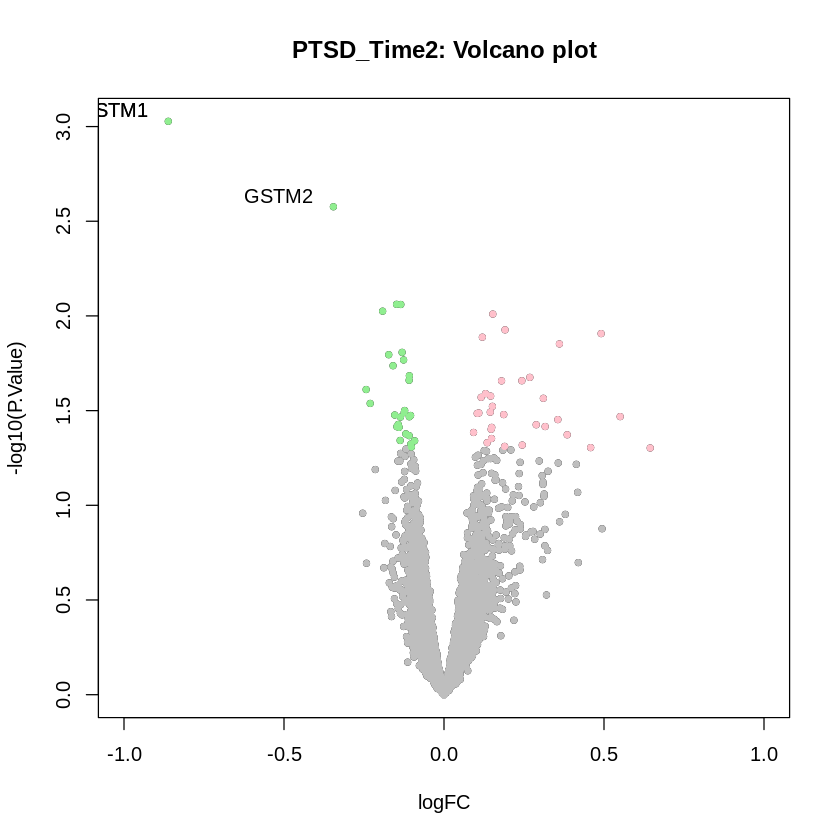

In [23]:
res <- results2
names <- rownames(res)
rownames(res) <- NULL
res <- cbind(names,res)

par(mfrow=c(1,1))
with(res, plot(logFC, -log10(P.Value), pch=20, main="PTSD_Time2: Volcano plot", xlim=c(-1.0,1.0)))

# Add colored points: red if adj.P.Val<0.05, orange of log2FC>1, green if both)
with(subset(res, P.Value>.05 ), points(logFC, -log10(P.Value), pch=20, col="grey"))
with(subset(res, P.Value<.05 & logFC<0), points(logFC, -log10(P.Value), pch=20, col="light green"))
with(subset(res, P.Value<.05 & logFC>0), points(logFC, -log10(P.Value), pch=20, col="pink"))
with(subset(res, adj.P.Val<.05 & logFC<0), points(logFC, -log10(P.Value), pch=20, col="green"))
with(subset(res, adj.P.Val<.05 & logFC>0), points(logFC, -log10(P.Value), pch=20, col="red"))

# Label points with the textxy function from the calibrate plot
with(subset(res, P.Value <0.001), textxy(logFC, -log10(P.Value), labs=names, cex=1))
with(subset(res, P.Value <0.01 & abs(logFC)>0.3), textxy(logFC, -log10(P.Value), labs=names, cex=1))

Plot **heatmap**. Label points with the textxy function from the calibrate plot

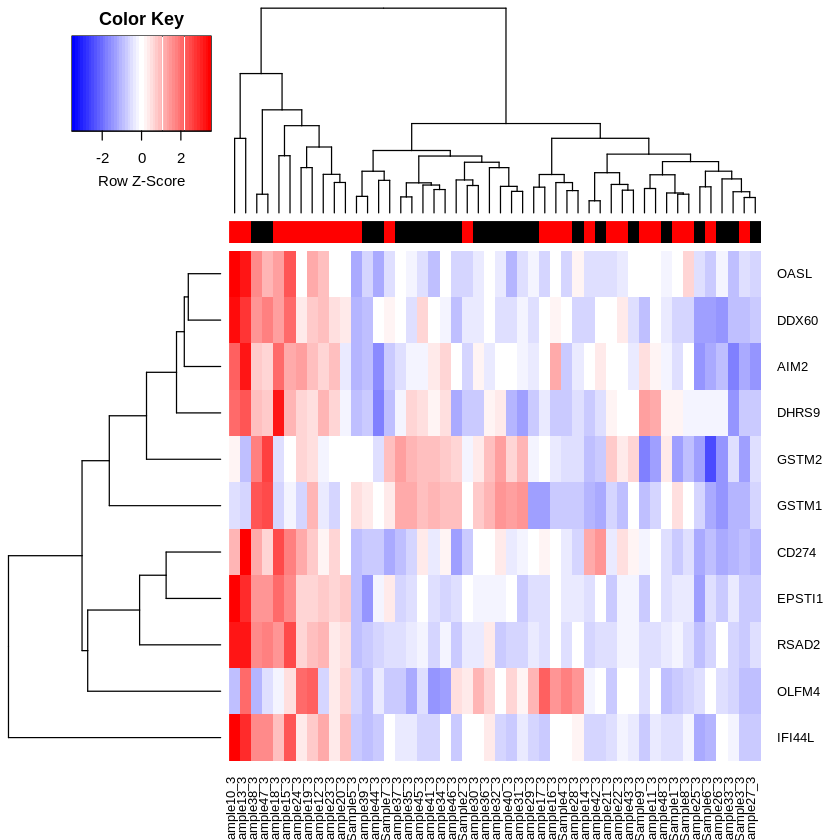

In [24]:
results2_2=results2[results2$P.Val< 0.05 & abs(results2$logFC)>0.3,] #p<0.05
tphenoXA=t(phenoXA)
heat_T=heatmap.2(beta.normXA[rownames(results2_2),],
                 trace="none", density="none", col=bluered(50), cexRow=1, cexCol=1, margins = c(5.0,5.0),
                 ColSideColors=tphenoXA["PTSD",], scale="row")

### LONGITUDINAL ANALYSIS

In [25]:
phenoXA=phenoA
beta.normXA=beta.normA

#### Step1: Create Design Matrix

In [26]:
Treat <- factor(paste(phenoXA$PTSD,phenoXA$Time,sep="."))
design <- model.matrix(~0+Treat, data=phenoXA)

#### Step2: Run model

In [27]:
corfit <- duplicateCorrelation(beta.normXA,design,block=phenoXA$FactorValue..individual.) 
corfit$consensus
fit <- lmFit(beta.normXA,design,block=phenoXA$FactorValue..individual.,correlation=corfit$consensus)

[1] -0.7575787

#### Step 3: Get top expressed genes and plots

In [28]:
cm <-makeContrasts(
  PTSDvsControl = (Treat2.2-Treat1.2)-(Treat2.1 - Treat1.1),
  PTSD = Treat2.2-Treat2.1,
  Control = Treat1.2-Treat1.1,
  levels=design)

In [29]:
fit2 <- contrasts.fit(fit, cm)
fit2 <- eBayes(fit2)

topTable(fit2, coef="PTSDvsControl")
topTable(fit2, coef="PTSD")
topTable(fit2, coef="Control")

longPTSDvsControl<- topTable(fit2, coef="PTSDvsControl", n=80000)
longPTSD<- topTable(fit2, coef="PTSD", n=80000)
longControl<- topTable(fit2, coef="Control", n=80000)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
CCL3,0.2598804,7.338252,2.760162,0.006892318,0.9999748,-3.170406
EWSR1,-0.1612481,7.988969,-2.420992,0.017312165,0.9999748,-3.557584
ZNF483,-0.2358831,5.689367,-2.413764,0.017639260,0.9999748,-3.565385
MTCP1,-0.2027217,6.651184,-2.354527,0.020533671,0.9999748,-3.628586
HSPE1,0.2090106,6.722190,2.336740,0.021481247,0.9999748,-3.647306
EGR1,0.3142633,8.119524,2.335090,0.021571096,0.9999748,-3.649037
SLC25A15,0.1574324,6.662346,2.272743,0.025218004,0.9999748,-3.713674
DDB2,-0.2033260,8.152129,-2.248704,0.026762735,0.9999748,-3.738201
TMEM169,0.1697009,6.748362,2.244802,0.027021183,0.9999748,-3.742161
MFSD12,-0.1813225,7.709783,-2.222720,0.028525199,0.9999748,-3.764462


,logFC,AveExpr,t,P.Value,adj.P.Val,B
ROMO1,1.0322593,8.284536,9.915703,1.782963e-16,9.861883e-13,26.084515
DRAP1,0.7321059,9.367247,9.899180,1.936741e-16,9.861883e-13,26.008909
AP2M1,0.5696904,9.604557,7.720818,9.780721e-12,3.320229e-08,16.050047
CYTH1,-0.3686363,10.187009,-6.947982,4.063514e-10,1.034571e-06,12.603314
C6orf47,-0.3817329,7.194775,-6.411262,5.038107e-09,1.026162e-05,10.273244
MED10,-0.7284329,7.329274,-6.142187,1.731314e-08,2.938617e-05,9.131018
ACAA1,-0.4500113,7.819972,-6.094639,2.148682e-08,3.126026e-05,8.931230
PRDX5,0.4469537,9.138761,6.003159,3.249343e-08,4.136414e-05,8.548690
WASH3P,-0.2252836,8.576162,-5.848223,6.507429e-08,7.363518e-05,7.906563
WASH1,-0.2798843,9.249824,-5.675247,1.399796e-07,1.425552e-04,7.198744


,logFC,AveExpr,t,P.Value,adj.P.Val,B
ROMO1,0.8508615,8.284536,8.173227,1.060136e-12,1.079643e-08,17.762522
DRAP1,0.5654894,9.367247,7.646272,1.407060e-11,7.164748e-08,15.432902
AP2M1,0.4474490,9.604557,6.064122,2.467272e-08,8.375565e-05,8.675895
CHMP2A,-0.3414934,11.456299,-5.785245,8.610644e-08,2.192270e-04,7.543974
CYTH1,-0.3011908,10.187009,-5.676783,1.390372e-07,2.831909e-04,7.110184
CALCRL,0.4483633,5.556721,5.451517,3.711226e-07,6.299188e-04,6.221769
LRP12,0.3666155,6.262502,5.358359,5.539148e-07,8.058669e-04,5.859594
ATF4,-0.2720498,9.497336,-5.316564,6.622134e-07,8.429977e-04,5.698145
DSC1,0.4290936,6.808185,5.068796,1.881277e-06,1.856648e-03,4.754906
NBEA,0.3608107,5.947179,5.066237,1.901421e-06,1.856648e-03,4.745292


In [30]:
res <- longPTSDvsControl
names <- rownames(res)
rownames(res) <- NULL
res <- cbind(names,res)

** Volcano plot**

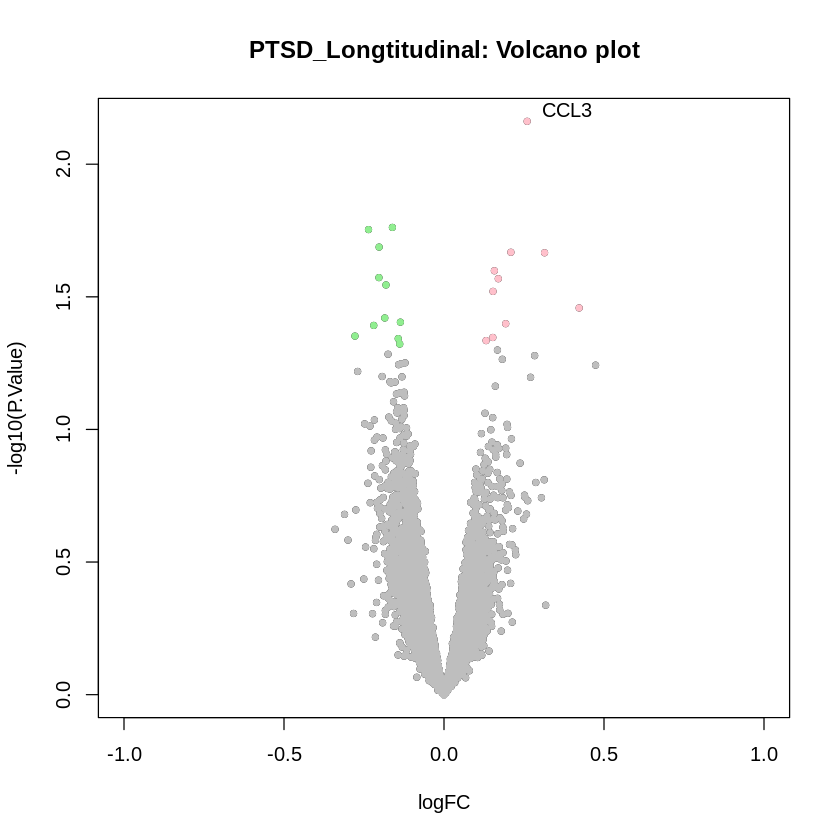

In [31]:
par(mfrow=c(1,1))
# Add colored points: red if adj.P.Val<0.05, orange of log2FC>1, green if both)
with(res, plot(logFC, -log10(P.Value), pch=20, main="PTSD_Longtitudinal: Volcano plot", xlim=c(-1.0,1.0)))
with(subset(res, P.Value>.05 ), points(logFC, -log10(P.Value), pch=20, col="grey"))
with(subset(res, P.Value<.05 & logFC<0), points(logFC, -log10(P.Value), pch=20, col="light green"))
with(subset(res, P.Value<.05 & logFC>0), points(logFC, -log10(P.Value), pch=20, col="pink"))
with(subset(res, adj.P.Val<.05 & logFC<0), points(logFC, -log10(P.Value), pch=20, col="green"))
with(subset(res, adj.P.Val<.05 & logFC>0), points(logFC, -log10(P.Value), pch=20, col="red"))
# Label points with the textxy function from the calibrate plot
with(subset(res, P.Value <0.01), textxy(logFC, -log10(P.Value), labs=names, cex=1))

** Heatmap **

In [32]:
results3_2=longPTSDvsControl[longPTSDvsControl$P.Val< 0.025,] #p<0.05
tphenoXA=t(phenoXA)

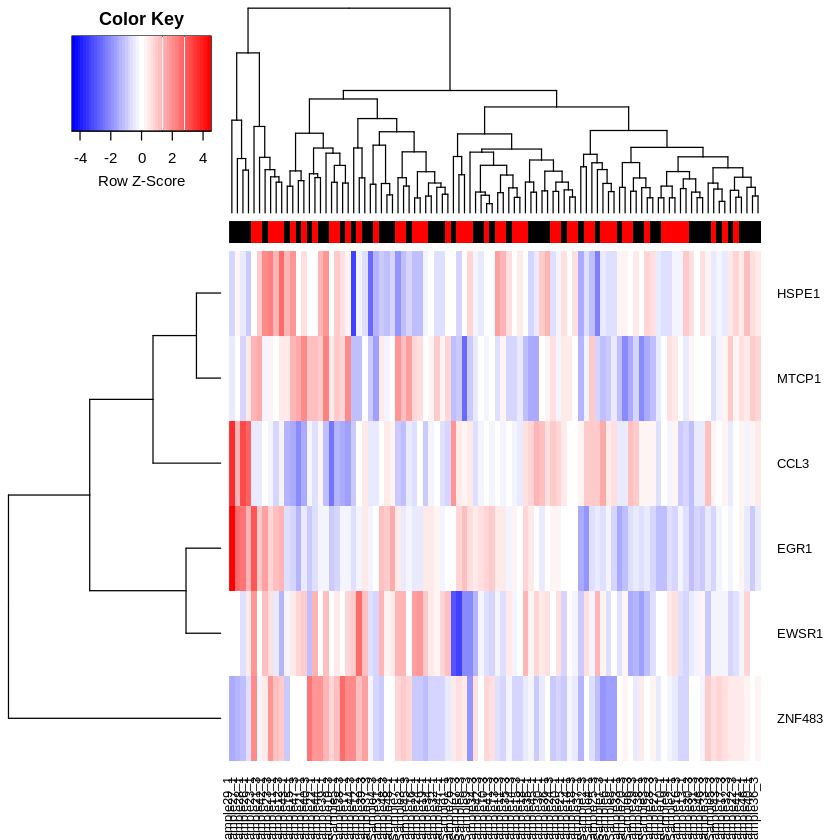

In [34]:
heat_T=heatmap.2(beta.normXA[rownames(results3_2),],
                 trace="none", density="none", col=bluered(50), cexRow=1, cexCol=1, margins = c(5.0,5.0),
                 ColSideColors=tphenoXA["PTSD",], scale="row")